In [2]:
using CSV
file1 = "./nyse/Fundamentals with Ratios FINAL/fundementals_with_ratios_training_set.csv"
file2 = "./nyse/Fundamentals with Ratios FINAL/fundementals_with_ratios_testing_set.csv"
file3 = "./nyse/Fundamentals with Ratios FINAL/fundementals_with_ratios_validation_set.csv"
raw_train = CSV.read(file1);
raw_test = CSV.read(file2);
raw_val = CSV.read(file3);

raw = vcat(raw_train, raw_test, raw_val)

1230×78 DataFrames.DataFrame. Omitted printing of 75 columns
│ Row  │ Ticker Symbol │ Period Ending │ Accounts Payable │
│      │ String⍰       │ Any           │ Int64⍰           │
├──────┼───────────────┼───────────────┼──────────────────┤
│ 1    │ AAL           │ 2012-12-31    │ 3068000000       │
│ 2    │ AAL           │ 2013-12-31    │ 4975000000       │
│ 3    │ AAP           │ 2012-12-29    │ 2409453000       │
│ 4    │ AAP           │ 2013-12-28    │ 2609239000       │
│ 5    │ AAP           │ 2016-01-02    │ 3757085000       │
│ 6    │ AAPL          │ 2013-09-28    │ 36223000000      │
│ 7    │ AAPL          │ 2016-09-24    │ 59321000000      │
│ 8    │ ABBV          │ 2013-12-31    │ 6448000000       │
│ 9    │ ABC           │ 2013-09-30    │ 14870635000      │
│ 10   │ ABC           │ 2016-09-30    │ 24670159000      │
⋮
│ 1220 │ WYN           │ 31/12/15      │ 1221000000       │
│ 1221 │ WYNN          │ 31/12/15      │ 657762000        │
│ 1222 │ XEC           │ 31/12/15      │ 396636000        │
│ 1223 │ XEL           │ 31/12/15      │ 1728410000       │
│ 1224 │ XLNX          │ 28/03/15      │ 321082000        │
│ 1225 │ XOM           │ 31/12/15      │ 35214000000      │
│ 1226 │ XRAY          │ 31/12/15      │ 463900000        │
│ 1227 │ XRX           │ 31/12/15      │ 2265000000       │
│ 1228 │ YHOO          │ 31/12/15      │ 1143349000       │
│ 1229 │ YUM           │ 26/12/15      │ 2165000000       │
│ 1230 │ ZBH           │ 31/12/15      │ 432000000        │

In [101]:
using Statistics
scale = zeros(74)
#Takes in dataframe and returns columns 3 - 76, normalized as a matrix
function normalize(data)
    newdata = zeros(length(data[:,1]), 74)

    for i in 3:76
        maxval = abs(maximum(data[:,i]))
        minval = abs(minimum(data[:,i]))

        if maxval != 0
            newdata[:,i-2] = data[:,i]/maxval
            scale[i-2] = maxval
        elseif minval != 0
            newdata[:,i-2] = data[:,i]/minval
            scale[i-2] = minval
        else
            mean = mean(data[:,i])
            newdata[:,i-2] = data[:,i]/mean
            scale[i-2] = mean
        end
    end
    return newdata
end
        

normalize (generic function with 1 method)

In [111]:
scale= scale'

1×74 Adjoint{Float64,Array{Float64,1}}:
 6.0671e10  4.692e9  1.4162e10  5789.0  …  4.03e11  4.86e11  2.3e11  50.09

In [103]:
using Statistics

B = normalize(raw)

1230×74 Array{Float64,2}:
 0.0505678   -0.0473146    -0.138469     …  -0.00159565   -0.111799  
 0.0819996   -0.019821     -0.192275         0.0          -0.224596  
 0.0397134   -0.0190712     4.23669e-5      -0.000117804   0.10561   
 0.0430064   -0.00691134    0.00019051      -0.000469087   0.107007  
 0.0619255   -0.00457715   -0.000528456     -0.000520474   0.128768  
 0.59704     -0.415388      0.0816269    …   0.0           0.799162  
 0.977749     0.222506      0.0951843        0.0           0.1667    
 0.106278     0.145141     -0.00381302      -0.0013913     0.0515073 
 0.245103    -0.492864     -3.10691e-6      -0.00659503    0.0375324 
 0.406622    -0.194528      0.000356447     -0.0191131     0.134358  
 0.179476     0.00767263   -0.0889705    …  -0.0243087     0.0750649 
 0.098037    -0.0240835     0.00374241      -0.0297565     0.0327411 
 0.0120199    0.00717157    6.53862e-5      -0.01584       0.0115792 
 ⋮                                       ⋱                      

In [79]:
raw[:,3][1]

3068000000

In [80]:
zeros(2,3)

2×3 Array{Float64,2}:
 0.0  0.0  0.0
 0.0  0.0  0.0

In [81]:
# A = []

# for i in 3:76
#     push!(A, raw[:,i])
# end

# A

In [82]:
# B = zeros(length(A),length(A[1]))

# for i in 1:length(A)
#     for j in 1:length(A[i])
#         B[i,j] = A[i][j]
#     end
# end

In [83]:
# B = B'
# B

In [84]:
prices = raw[:78]
shares = raw[:77]

mkt_cap = prices.*shares
y = mkt_cap

1230-element Array{Float64,1}:
 4.5225e9             
 4.1163111105499997e9 
 5.2405070845259075e9 
 8.033962420493641e9  
 1.1046686916792408e10
 6.38079013826423e10  
 6.16692422074763e11  
 8.44960016e10        
 1.4095477040689575e10
 1.71393912657483e10  
 4.984001182011525e10 
 6.0206149470773415e10
 2.8388531049987858e10
 ⋮                    
 1.7044808987484e10   
 8.583359306258436e9  
 7.001096109288057e9  
 8.306781057429774e9  
 1.8223121828267998e10
 1.1242828328632e10   
 3.269850523658344e11 
 8.539396365504609e9  
 1.199671429027e10    
 3.1246348837061348e10
 2.3160433761956726e10
 1.9334268480868847e10

In [85]:
prices

1230-element Array{Union{Missing, Float64},1}:
  13.5              
  25.25             
  71.510002         
 109.91999799999999 
 150.509995         
  68.9642868571     
 112.709999         
  52.810001         
  61.099998         
  80.779999         
  31.426873131199997
  38.330002         
  56.779999         
   ⋮                
  29.98             
  72.650002         
  69.190002         
  89.379997         
  35.91             
  42.32             
  77.949997         
  60.849998         
  10.63             
  33.259998         
  53.19914019       
 102.589996         

In [23]:
# using Pkg
# Pkg.add("Ipopt")
#Pkg.build("Gurobi")

In [132]:
# NOTE: must have either Gurobi or Mosek installed!

# Solve the LEAST SQUARES polynomial fit

using JuMP, Mosek
#,Mosek Ipopt, Gurobi

#m = Model(solver=ClpSolver())
m = Model(solver=MosekSolver(LOG=0))
#m = Model(solver=GurobiSolver(OutputFlag=0,BarHomogeneous=1))
#m = Model(solver=GurobiSolver(OutputFlag=0,NumericFocus=3,BarHomogeneous=1))
#m = Model(solver=IpoptSolver())

@variable(m, u[1:74])
#@constraint(m, bound[i in 1:74],u[i] <= 100000)
@objective(m, Min, sum( (y - B*u).^2 ) )
# 1/1000000000000000
status = solve(m)
uopt = getvalue(u)
println(status)
println(getobjectivevalue(m))
println(uopt)

MOSEK warning 57: A large value of -1.7e+13 has been specified in cx for variable '' (0).
MOSEK warning 57: A large value of  4.9e+12 has been specified in cx for variable '' (1).
MOSEK warning 57: A large value of -2.8e+12 has been specified in cx for variable '' (2).
MOSEK warning 57: A large value of -5.4e+11 has been specified in cx for variable '' (3).
MOSEK warning 57: A large value of  1.1e+13 has been specified in cx for variable '' (4).
MOSEK warning 57: A large value of -7.7e+12 has been specified in cx for variable '' (5).
MOSEK warning 57: A large value of -6.1e+12 has been specified in cx for variable '' (6).
MOSEK warning 57: A large value of -7.6e+12 has been specified in cx for variable '' (7).
MOSEK warning 57: A large value of  6.9e+12 has been specified in cx for variable '' (8).
MOSEK warning 57: A large value of -8.8e+12 has been specified in cx for variable '' (9).
Unbounded
NaN
[NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, 

┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/ritik/.juliapro/JuliaPro_v1.0.3.1/packages/JuMP/PbnIJ/src/solvers.jl:212
┌ Warning: Variable value not defined for component of u. Check that the model was properly solved.
└ @ JuMP /Users/ritik/.juliapro/JuliaPro_v1.0.3.1/packages/JuMP/PbnIJ/src/JuMP.jl:475


In [10]:
save = uopt

save2 = [-0.904596, 4.02153, -4.34669, -3.4652e-5, -1.14616, 2.05439, 6.68269e-5, 2.41002, -1.49384, 0.674424, -13.3776, 0.0001256, -4.24663, -4.57412, -6.17971, -8.12698, 10.9355, -9.08895, 5.40283, -4.88962, -4.90969, 1.5144e-5, -12.9373, 0.896526, -5.44573, -19.0791, 0.0910465, 2.38582, 2.05383, -0.14202, -5.41484, -0.81778, -7.46986, -5.51625, -5.48231, 1.85351, 6.62424, 1.50986, -9.65292, 9.92502, 15.526, 1.54486, -2.31853, -5.58275, -2.53421, 5.87858e-6, -0.239388, -2.89789, -1.40539, 2.08033, -3.04955, 2.75532, -3.01444, 13.6965, 0.339098, 8.62275e-6, -4.28941e-5, 6.57062e-6, 0.000111392, 2.64309, 0.589265, -2.24175, 0.415502, 1.39655, 1.13279, 1.46218, -4.73024, -0.913433, -24.0713, -20.7114, 26.8983, 13.2183, -0.252534, -1.84834e-7]

74-element Array{Float64,1}:
   -3.2968458288809757  
    2.1039233156959605  
   -2.8798890420640695  
   -4.710946287874024e7 
  214.78856853320923    
    2.2992478015428515  
   -2.154712621993699e7 
  129.44857473185635    
   -1.866120816099335   
    0.8783916291332114  
  -62.63355971223919    
   -1.0470435826426757e7
   54.543614253909      
    ⋮                   
    0.49559443560347594 
    0.0                 
  128.2946880952503     
  -53.98282592281477    
  -78.38197456618977    
    2.9655165221654203  
 -156.82363531936204    
 -155.60382101475793    
  160.84037636094504    
   62.46170869031843    
    0.1946569891712229  
   -7.096294621575892e7 

In [11]:
test = "./nyse/Fundamentals with Ratios FINAL/fundementals_with_ratios_testing_set.csv"
raw2 = CSV.read(test)

raw2

307×78 DataFrames.DataFrame. Omitted printing of 74 columns
│ Row │ Ticker Symbol │ Period Ending │ Accounts Payable │ Accounts Receivable │
│     │ String⍰       │ Dates…⍰       │ Int64⍰           │ Int64⍰              │
├─────┼───────────────┼───────────────┼──────────────────┼─────────────────────┤
│ 1   │ AAL           │ 2014-12-31    │ 4668000000       │ -160000000          │
│ 2   │ AAPL          │ 2014-09-27    │ 48649000000      │ -6452000000         │
│ 3   │ ABC           │ 2014-09-30    │ 17250160000      │ -938286000          │
│ 4   │ ABT           │ 2014-12-31    │ 5350000000       │ -195000000          │
│ 5   │ ADBE          │ 2014-11-28    │ 776163000        │ 7928000             │
│ 6   │ ADI           │ 2014-11-01    │ 430621000        │ -36460000           │
│ 7   │ ADM           │ 2014-12-31    │ 15240000000      │ 425000000           │
│ 8   │ ADS           │ 2014-12-31    │ 914058000        │ -156003000          │
│ 9   │ ADSK          │ 2014-01-31    │ 375300000        │ 72300000            │
│ 10  │ AEE           │ 2014-12-31    │ 842000000        │ 31000000            │
⋮
│ 297 │ WYN           │ 2014-12-31    │ 1134000000       │ -250000000          │
│ 298 │ WYNN          │ 2014-12-31    │ 728686000        │ 38000               │
│ 299 │ XEC           │ 2014-12-31    │ 740552000        │ -35133000           │
│ 300 │ XEL           │ 2014-12-31    │ 1879877000       │ -166408000          │
│ 301 │ XLNX          │ 2014-03-29    │ 369260000        │ -38658000           │
│ 302 │ XOM           │ 2014-12-31    │ 47165000000      │ 3118000000          │
│ 303 │ XRAY          │ 2014-12-31    │ 540800000        │ 7200000             │
│ 304 │ XRX           │ 2014-12-31    │ 2338000000       │ 67000000            │
│ 305 │ YHOO          │ 2014-12-31    │ 4178020000       │ 29278000            │
│ 306 │ YUM           │ 2014-12-27    │ 2142000000       │ -21000000           │
│ 307 │ ZBH           │ 2014-12-31    │ 225500000        │ -40400000           │

In [48]:
AAPL = raw2[302,3:76]

DataFrameRow. Omitted printing of 71 columns
│ Row │ Accounts Payable │ Accounts Receivable │ Add'l income/expense items │
│     │ Int64⍰           │ Int64⍰              │ Union{Missing, Int64}      │
├─────┼──────────────────┼─────────────────────┼────────────────────────────┤
│ 302 │ 47165000000      │ 3118000000          │ 4511000000                 │

In [49]:
using LinearAlgebra
AAPL = convert(Array, AAPL)

┌ Warning: `convert(::Type{Array}, dfr::DataFrameRow)` is deprecated, use `permutedims(Vector(dfr))` instead.
│   caller = top-level scope at In[49]:2
└ @ Core In[49]:2


1×74 Array{Any,2}:
 47165000000  3118000000  4511000000  19  …  3.49e11  3.94e11  -2.26e11  7.6

In [53]:
AAPL_Test = AAPL * save

1-element Array{Any,1}:
 4.078281678041825e11

In [54]:
AAPL_shares = raw2[302,77]

4.278947368e9

In [55]:
AAPL_price = raw2[302, 78]

92.449997

In [56]:
AAPL_shares * AAPL_price

3.955886713347579e11

In [57]:
AAPL_Test/AAPL_shares

1-element Array{Float64,1}:
 95.31039592917529

### Part 2: 

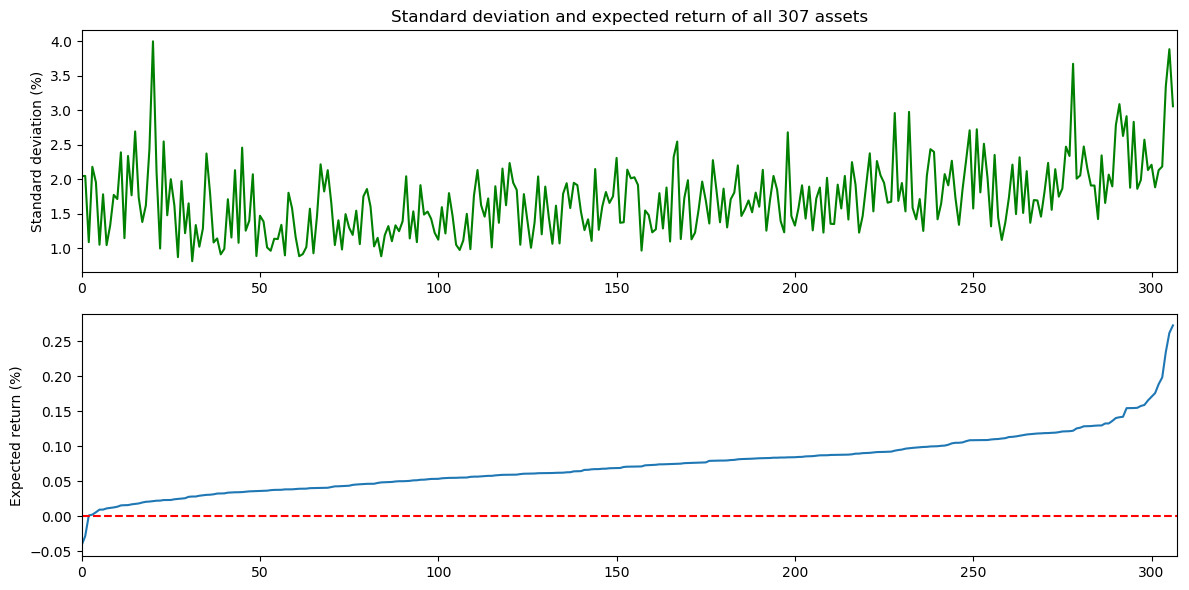

In [2]:
using CSV, LinearAlgebra

μ = convert(Vector, CSV.read("./nyse/Portfolio calculations/expected-return-risk.csv", header = true)[2])  # Expected return (in percent)
Σ = convert(Matrix, CSV.read("./nyse/Portfolio calculations/covariance-matrix.csv", header=false))   # Expected variance (in percent squared)
tickers = convert(Vector, CSV.read("./nyse/Portfolio calculations/expected-return-risk.csv", header = true)[1])  # Tickers

#ix = 1:307;   
ix = sortperm(μ) # get order of indices which will sort the assets by expected return
nAssets = 307

using PyPlot
fig = figure(figsize=(12,6))

subplot(211)
xlim(0,nAssets)
plot(sqrt.(diag(Σ))[ix],"g")
ylabel("Standard deviation (%)")
title("Standard deviation and expected return of all 307 assets")
tight_layout()

subplot(212)
xlim(0,nAssets)
plot(μ[ix])
plot([0,nAssets],[0,0],"r--")
ylabel("Expected return (%)")
tight_layout()
#savefig("folio1_vals.pdf")
;

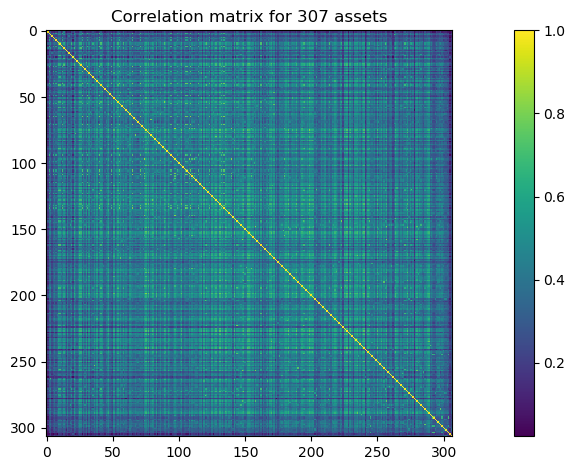

In [3]:
# plot correlation matrix (shows which assets are correlated with which other assets)
corr = diagm(0 => diag(Σ).^(-1/2))*Σ*diagm(0 => diag(Σ).^(-1/2))
imshow(corr[ix,ix]);colorbar();axis("image")
title("Correlation matrix for 307 assets")
tight_layout()
#savefig("folio2_cov.pdf")

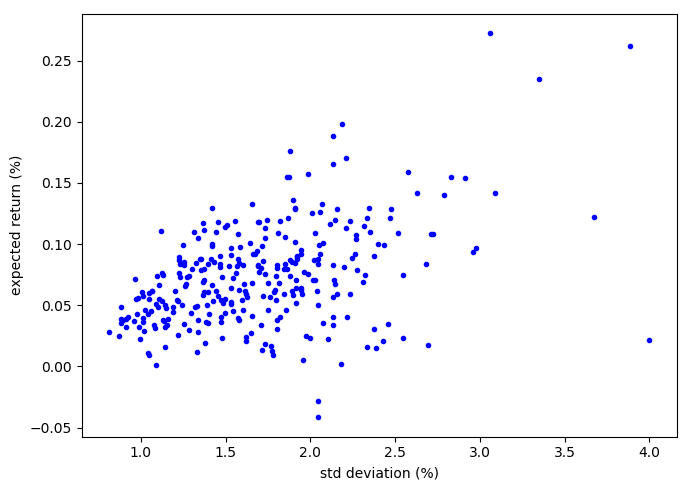

In [4]:
# plot each asset individually
figure(figsize=(7,5))
plot(sqrt.(diag(Σ)), μ, "b.")
xlabel("std deviation (%)")
ylabel("expected return (%)")
tight_layout()
#savefig("folio3_assets.pdf")
;

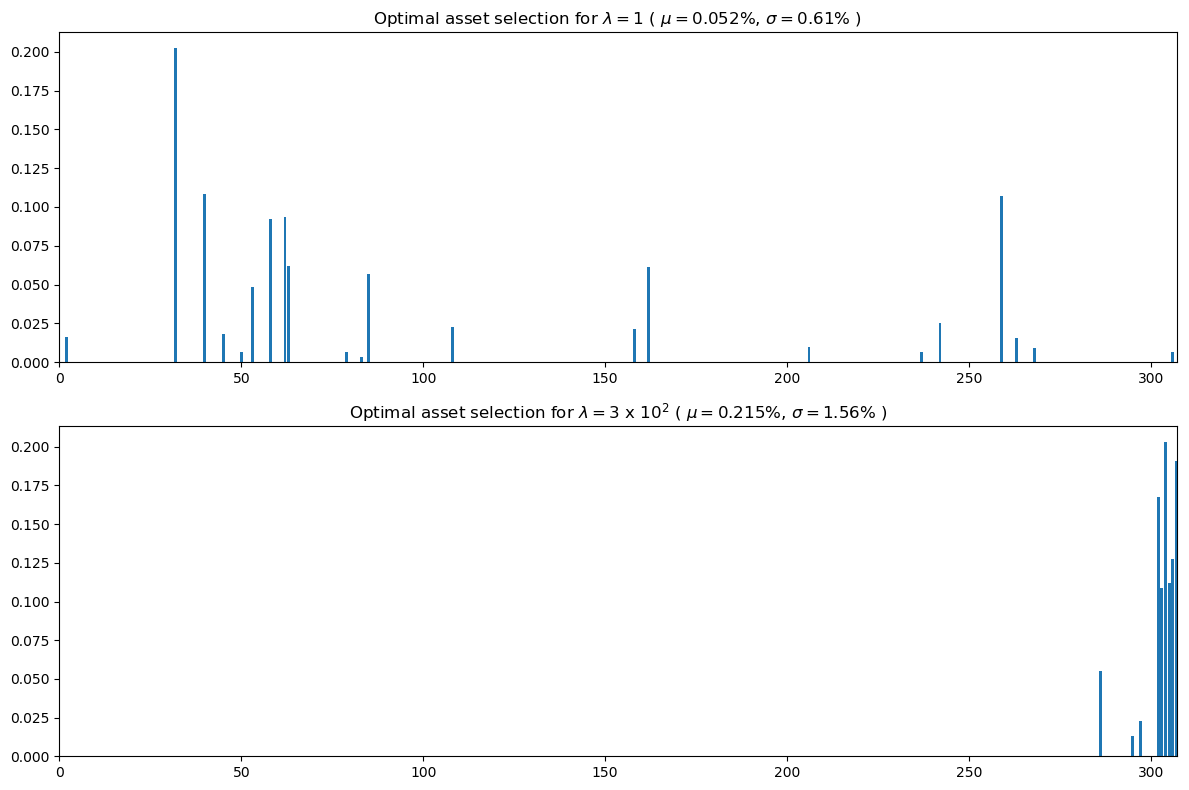

In [11]:
# find optimal portfolio for one particular choice of λ
using JuMP, Mosek
m = Model(solver = MosekSolver(LOG=0))
@variable(m, x[1:nAssets] >= 0) # Investment amounts non-negative (cannot sell short assets)
@constraint(m, sum(x) == 1)     # Must invest all of portfolio

figure(figsize=(12,8))

subplot(211)
λ = 1

@objective(m, Min, -dot(μ,x) + λ*dot(x,Σ*x) )
solve(m)
xsol1 = getvalue(x)
ix1 = findall(xsol1 .> 1e-4)
ret = dot(μ,xsol1)
std = sqrt(dot(xsol1,Σ*xsol1))
xlim(0,nAssets)
bar(1:nAssets,xsol1[ix])
title(string("Optimal asset selection for \$\\lambda=1\$"," ( \$\\mu=\$", round(ret,digits=3), "%, \$\\sigma=\$", round(std,digits=2), "% )"));
tight_layout()
subplot(212)
λ = 3e-2

@objective(m, Min, -dot(μ,x) + λ*dot(x,Σ*x) )
solve(m)
xsol2 = getvalue(x)
ix2 = findall(xsol2 .> 1e-4)
ret = dot(μ,xsol2)
std = sqrt(dot(xsol2,Σ*xsol2))
xlim(0,nAssets)
bar(1:nAssets,xsol2[ix])
title(string("Optimal asset selection for \$\\lambda=3\$ x \$ 10^{2}\$"," ( \$\\mu=\$", round(ret,digits=3), "%, \$\\sigma=\$", round(std,digits=2), "% )"));
tight_layout()




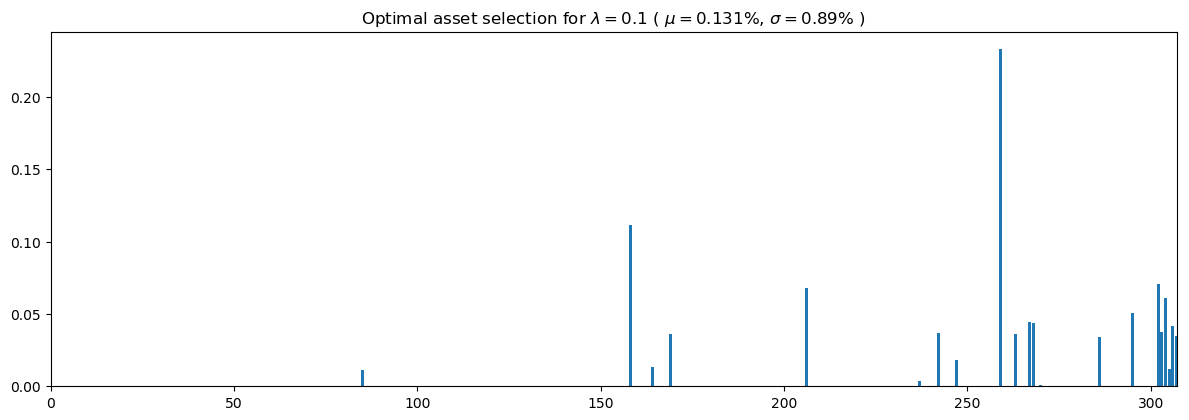

In [12]:
figure(figsize=(12,8))
subplot(211)
λ = 0.1

@objective(m, Min, -dot(μ,x) + λ*dot(x,Σ*x) )
solve(m)
xsol3 = getvalue(x)
ix3 = findall(xsol3 .> 1e-4)
ret = dot(μ,xsol3)
std = sqrt(dot(xsol3,Σ*xsol3))
xlim(0,nAssets)
bar(1:nAssets,xsol3[ix])
title(string("Optimal asset selection for \$\\lambda=0.1\$"," ( \$\\mu=\$", round(ret,digits=3), "%, \$\\sigma=\$", round(std,digits=2), "% )"));
tight_layout()


#savefig("folio4_optassets.pdf")

In [14]:
ix1

22-element Array{Int64,1}:
   2
   3
   4
  29
  42
  54
  76
  80
  85
 122
 158
 161
 168
 181
 191
 202
 203
 222
 252
 284
 287
 294

In [8]:
# compute optimal tradeoff curve (this may take a few seconds)
N = 50
ret = zeros(N)
std = zeros(N)
lambda_values = exp10.(range(-3,stop=4,length=N))

for (i,λ) in enumerate(lambda_values)
    @objective(m, Min, -dot(μ,x) + λ*dot(x,Σ*x) )
    solve(m)
    xsol = getvalue(x)
    ret[i] = dot(μ,xsol)
    std[i] = sqrt(dot(xsol,Σ*xsol))
end

In [1]:
# plot tradeoff curve
plot(std,ret,"b-")
plot(sqrt.(diag(Σ)), μ, "k.", markersize=12)
#plot(sqrt.(diag(Σ))[ix1], μ[ix1], "r.", markersize=12)  # low-risk portfolio
plot(sqrt.(diag(Σ))[ix2], μ[ix2], "b.", markersize=12)  # at the "elbow" of the curve
xlabel("std deviation (%)")
ylabel("expected return (%)")
#axis([1.5,4.5,0,.4]);
tight_layout()
#savefig("folio5_pareto.pdf")

UndefVarError: UndefVarError: plot not defined

In [15]:
ix2

9-element Array{Int64,1}:
   1
  14
  37
  55
 121
 203
 213
 236
 270

In [210]:
function check_profits(ix, amount, prices_test, prices_val, xsol)
    profit = 0
    exp_returns = 0
    for i in 1:length(ix)
        print("Loop started")
        company = tickers[ix[i]]
        init_price = prices_test[ix[i]]
        final_price = prices_val[ix[i]]
        percent_invested = xsol[ix1[i]]
        println(percent_invested)
        percent_invested = abs(percent_invested)
        invested = percent_invested*amount
        num_stocks = invested/init_price
        final_sell_price = num_stocks*final_price
        diff = final_sell_price - invested
        profit+=diff
        println("Bought ", company, " at ", init_price, " sold: ", final_price)
    end
    exp_returns = profit/amount
    println("Total profit: ", profit)
    println("Portfolio returns (percent) ", exp_returns)
end

check_profits (generic function with 1 method)

In [141]:
abs(-2.56975169751838e-13  )

2.56975169751838e-13

In [13]:
for i in 1:length(ix1)
    println("Company: - ", tickers[ix1[i]], " % Alloc: ", xsol1[ix1[i]]*100)
end


Company: - AAPL % Alloc: 0.9148079777273659
Company: - ABC % Alloc: 0.6244253244223325
Company: - ABT % Alloc: 0.3161307385332563
Company: - AZO % Alloc: 10.702945125512258
Company: - CAG % Alloc: 1.8221348321532893
Company: - CLX % Alloc: 4.832976270694808
Company: - DG % Alloc: 2.5109347674459275
Company: - DLTR % Alloc: 1.5747225192307652
Company: - DUK % Alloc: 0.6490482411674314
Company: - GIS % Alloc: 6.2225531353782095
Company: - KMB % Alloc: 5.6471129251125625
Company: - KR % Alloc: 0.986654372579879
Company: - LLY % Alloc: 2.2579439737010136
Company: - MCD % Alloc: 9.242059779937646
Company: - MO % Alloc: 2.1262902765260683
Company: - NEM % Alloc: 1.6419610562673905
Company: - NFLX % Alloc: 0.6801978332333121
Company: - PEP % Alloc: 9.354868790494749
Company: - SO % Alloc: 20.238820974708446
Company: - VRSK % Alloc: 6.144362453118707
Company: - VZ % Alloc: 0.6686840697298564
Company: - WMT % Alloc: 10.839814825606469


In [83]:
test_file = "./nyse/Fundamentals with Ratios FINAL/fundementals_with_ratios_testing_set.csv"
val_file = "./nyse/Fundamentals with Ratios FINAL/fundementals_with_ratios_validation_set.csv"
raw_test = CSV.read(test_file);
raw_val = CSV.read(val_file);

In [84]:
prices_test = convert(Vector, CSV.read(test_file, header = true)[78])  # Prices - testing
prices_val = convert(Vector, CSV.read(val_file, header = true)[78])  # Prices - validation

306-element Array{Union{Missing, Float64},1}:
  42.349998  
 114.709999  
  94.989998  
  44.91      
  92.169998  
  60.119999  
  36.68      
 276.570007  
  54.009998  
  43.23      
  52.630001  
  56.009998  
  80.510002  
   ⋮         
  29.98      
  72.650002  
  69.190002  
  89.379997  
  35.91      
  42.32      
  77.949997  
  60.849998  
  10.63      
  33.259998  
  53.19914019
 102.589996  

In [23]:
prices_test

307-element Array{Union{Missing, Float64},1}:
  53.630001         
 100.75             
  77.300003         
  45.02             
  73.68             
  49.619999         
  52.0              
 286.049988         
  51.25             
  46.130001         
  62.959998999999996
  60.130001         
  59.759997999999996
   ⋮                
  35.889998999999996
  85.760002         
 148.759995         
 106.0              
  35.919998         
  53.84             
  92.449997         
  53.27             
  13.86             
  50.509997999999996
  52.5808763479     
 113.41999799999999 

In [53]:
check_profits(ix1, 100000, prices_test, prices_val, xsol1)

Bought AAPL at 100.75 sold: 114.709999
Bought ABC at 77.300003 sold: 94.989998
Bought ABT at 45.02 sold: 44.91
Bought AZO at 538.840027 sold: 726.390015
Bought CAG at 24.599221789899996 sold: 30.04669105
Bought CLX at 91.400002 sold: 104.019997
Bought DG at 56.32 sold: 67.059998
Bought DLTR at 50.52 sold: 71.099998
Bought DUK at 83.540001 sold: 71.389999
Bought GIS at 53.810001 sold: 56.150002
Bought KMB at 115.540001 sold: 127.300003
Bought KR at 18.049999 sold: 34.5250015
Bought LLY at 68.989998 sold: 84.260002
Bought MCD at 93.699997 sold: 118.139999
Bought MO at 49.27 sold: 58.209999
Bought NEM at 18.9 sold: 17.99
Bought NFLX at 48.8014297142 sold: 114.379997
Bought PEP at 97.050003 sold: 100.540001
Bought SO at 49.110001000000004 sold: 46.790001
Bought VRSK at 64.050003 sold: 76.879997
Bought VZ at 46.779999 sold: 46.220001
Bought WMT at 74.68 sold: 84.980003
Total profit: 14066.17733096201
Portfolio returns (percent) 0.1406617733096201


In [54]:
check_profits(ix2, 100000, prices_test, prices_val, xsol2)

Bought AAL at 53.630001 sold: 42.349998
Bought ALXN at 185.029999 sold: 190.75
Bought BIIB at 339.450012 sold: 306.350006
Bought CMG at 684.51001 sold: 479.850006
Bought GILD at 94.260002 sold: 101.190002
Bought NFLX at 48.8014297142 sold: 114.379997
Bought ORLY at 192.619995 sold: 253.419998
Bought REGN at 410.25 sold: 542.869995
Bought TSCO at 77.91999799999999 sold: 85.669998
Total profit: -0.12109315829337436
Portfolio returns (percent) -1.2109315829337436e-6


In [51]:
check_profits(ix3, 100000, prices_test, prices_val, xsol3)

Total profit: 13222.494185645339
Portfolio returns (percent) 0.1322249418564534


In [60]:
using LinearAlgebra

function get_diff_expected_prices(coeffs, raw_test)
    actual_prices = raw_test[78]
    num_shares = raw_test[77]
    
    raw_temp = raw_test[:,3:76] #All fundamentals
    raw_temp = convert(Matrix, raw_temp)
    #raw_temp = raw_temp./scale #only use if using normalized, run normalize before this
    exp_valuations = raw_temp * coeffs
    exp_valuations = exp_valuations - bias
    exp_prices = exp_valuations ./ num_shares
    diff = (exp_prices - actual_prices)./actual_prices*100
    return diff
end

get_diff_expected_prices (generic function with 1 method)

In [61]:
#raw[:,1]

for i in 1:length(raw[:,1])
    if raw[i,1] == "AAPL"
        println("AAPLE")
    end
end

raw[1,1]

AAPLE
AAPLE
AAPLE
AAPLE


"AAL"

In [62]:
# train - train raw data
#TODO: fix to calculate bias for each company in test
function get_bias_diff(train, coeffs, test)
    actual_prices = train[78]
    num_shares = train[77]
    actual_valuations = actual_prices .* num_shares
    
    raw_temp = train[:,3:76] #All fundamentals
    raw_temp = convert(Matrix, raw_temp)
    exp_valuations = raw_temp * coeffs
    
    bias = []
    
    for s in test[:,1]
        sum_diff_valuations = 0
        count = 0
        for i in 1:length(train[:,1])
            if train[i,1] == s
                #println(exp_valuations[i])
                #println(actual_valuations[i])
                sum_diff_valuations += exp_valuations[i] - actual_valuations[i]
                count += 1
            end
        end
        if count == 0
            avg = 0
        else
            avg = sum_diff_valuations/count
        end
        push!(bias, avg)
        #break
    end
    
    return bias
end

get_bias_diff (generic function with 1 method)

In [63]:
bias = get_bias_diff(raw_train, coeffs, raw_test)

306-element Array{Any,1}:
  2.1286797650725e10   
  1.2115301518879736e11
  3.474834229779396e9  
  4.212486930556679e8  
 -7.057773743934288e9  
 -7.937809396598804e9  
 -1.0445493476087486e10
 -1.1717819374663841e10
  6.4646332298602495e9 
  7.147177648554385e9  
  8.087330322882248e9  
  5.525615656937948e9  
  7.110746675310836e9  
  ⋮                    
 -5.536849773937501e9  
  6.135904800770494e9  
 -8.770654766359034e8  
  4.372420553756065e9  
 -1.0023203558426105e10
  1.0166660201934155e10
  1.7204095747930054e10
  2.2974285956502237e9 
  7.006579122004999e9  
 -5.4312868967832565e7 
 -5.477176687155941e9  
  1.0003552405285997e10

In [64]:
using CSV
#IPOPT Zach
coeffs = [-6585.97, 5.19783, -2.08566, -2.34796e7, 175.366, 1.09387, -1.95368e7, 37.6399, 10.1514, 0.866736, -28.8113, 1.07816e7, 50.6525, -6.65774, 7.34417, -13.3521, 10.0877, 2.79358, 4.9708, 50.6117, 50.1046, 3.22441e7, -27.4894, 0.971842, 49.9912, -12.8875, 35.0389, 173.64, 13.5846, -4.14503, 49.9063, -4.62288, -9.04414, 4.11007, -15.2627, 5.8904, 9.54823, -160.26, -22.1404, 9.51734, 30.8563, 0.56197, 34.5639, 0.584742, 4.80161, -1.49687e8, 53.1586, 34.5638, -6588.73, 0.626721, 6.4768, 175.285, -6.03566, 8.35272, -0.72425, 1.25293e8, 1.65794e7, 1.94026e8, 1.76579e7, 0.585443, 0.670453, 3.29647, -0.522039, -6587.41, 37.0568, -48.3001, 14.1608, 6582.95, -59.9027, -54.3424, 57.739, 28.5186, 0.252042, -3.91443e8]

#Mosek
#coeffs = [-3.29685, 2.10392, -2.87989, -4.71095e7, 214.789, 2.29925, -2.15471e7, 129.449, -1.86612, 0.878392, -62.6336, -1.04704e7, 54.5436, -2.04819, -6.15197, 2078.11, -2096.01, -8.79425, 10.5703, 49.0736, 48.8301, 1.61191e7, -62.5332, 13.7874, 49.2048, -2114.64, 128.127, 217.775, 5.58733, 1.76512, 48.2034, 1.41479, -8.08089, -2.07809, -4.6603, 3.39356, 3.1628, -214.997, -50.5996, 8.55579, 55.723, 12.2455, 125.514, -5.33886, 7.06743, -5.26894e8, 53.8186, 125.442, -1.9223, 2.44833, -0.537384, 218.727, -0.0972079, 9.85327, -1.1946, 5.35222e8, 3.2696e7, -7.26781e6, 4.27104e7, 0.430482, 0.744881, 1.03829, 0.495594, 0.0, 128.295, -53.9828, -78.382, 2.96552, -156.824, -155.604, 160.84, 62.4617, 0.194657, -7.09629e7]

#coeffs = [-0.904596, 4.02153, -4.34669, -3.4652e-5, -1.14616, 2.05439, 6.68269e-5, 2.41002, -1.49384, 0.674424, -13.3776, 0.0001256, -4.24663, -4.57412, -6.17971, -8.12698, 10.9355, -9.08895, 5.40283, -4.88962, -4.90969, 1.5144e-5, -12.9373, 0.896526, -5.44573, -19.0791, 0.0910465, 2.38582, 2.05383, -0.14202, -5.41484, -0.81778, -7.46986, -5.51625, -5.48231, 1.85351, 6.62424, 1.50986, -9.65292, 9.92502, 15.526, 1.54486, -2.31853, -5.58275, -2.53421, 5.87858e-6, -0.239388, -2.89789, -1.40539, 2.08033, -3.04955, 2.75532, -3.01444, 13.6965, 0.339098, 8.62275e-6, -4.28941e-5, 6.57062e-6, 0.000111392, 2.64309, 0.589265, -2.24175, 0.415502, 1.39655, 1.13279, 1.46218, -4.73024, -0.913433, -24.0713, -20.7114, 26.8983, 13.2183, -0.252534, -1.84834e-7]

#Normalized
coeffs_n = [-4.5859e14, 2.50025e10, -3.38327e10, -1.35684e11, 6.66542e12, 1.00277e11, -2.03853e10, 2.02611e12, 2.75485e10, 5.90631e10, -1.04976e13, 1.31135e10, 1.16194e12, -3.77356e11, 2.13436e11, -4.08099e12, 3.78494e12, 4.614e8, 6.98516e10, 1.29054e13, 5.30215e12, 3.12968e9, -4.09338e12, 3.77527e10, 6.09718e12, 1.27782e11, 1.66683e12, 6.6663e12, 2.10368e11, -4.96317e11, 8.55499e12, -2.63051e11, -1.27198e10, 1.76821e11, -7.06928e11, 3.71343e11, 2.14647e11, -1.15964e12, -1.16167e12, 1.61911e11, 1.62574e12, 4.28486e10, 3.23015e12, 1.54919e10, 3.5552e11, -7.13846e10, 8.21977e11, 6.29549e11, -2.52678e14, 1.3171e10, 1.15349e10, 1.91134e12, -3.42966e11, 5.92098e10, -1.67558e10, 6.43586e10, 1.50639e11, 6.88924e10, 2.06441e10, 8.5194e9, 2.80942e11, 1.65688e10, -4.90203e10, -3.24894e14, 3.99167e12, -1.96644e13, 2.00524e12, 6.22097e14, -1.06497e13, -1.55806e13, 2.38363e13, 1.38357e13, 6.00942e10, -1.92723e10]

raw_test = CSV.read("./nyse/Fundamentals with Ratios FINAL/fundementals_with_ratios_testing_set.csv")

percent_diffs = get_diff_expected_prices(coeffs, raw_test)

306-element Array{Float64,1}:
 -48.8013198790651   
 -43.28231251646719  
 -34.31250294354074  
 -40.12349772747596  
 -21.07457964742557  
 -69.07544883426185  
  17.148318690287894 
 -47.519549930248154 
 -32.545409374215936 
 -25.44786467434596  
 -18.33163728087555  
  10.208042680140785 
 -46.7961768135551   
   ⋮                 
   6.2808192094924244
  -5.757713515200946 
 -23.750594072302945 
 -19.254210340826475 
  71.0193590446796   
 -38.162189806429645 
  -0.6217800589154064
   1.7349288616089764
 -25.711729191414058 
  -8.774277373316762 
  -1.3177579431298676
 -18.04390376391334  

In [65]:
raw_test[:,78]

306-element Array{Union{Missing, Float64},1}:
  53.630001  
 100.75      
  77.300003  
  45.02      
  73.68      
  49.619999  
  52.0       
 286.049988  
  51.25      
  46.130001  
  62.959999  
  60.130001  
  59.759998  
   ⋮         
  35.889999  
  85.760002  
 148.759995  
 106.0       
  35.919998  
  53.84      
  92.449997  
  53.27      
  13.86      
  50.509998  
  52.58087635
 113.419998  

In [66]:
raw_val[:,78]

306-element Array{Union{Missing, Float64},1}:
  42.349998  
 114.709999  
  94.989998  
  44.91      
  92.169998  
  60.119999  
  36.68      
 276.570007  
  54.009998  
  43.23      
  52.630001  
  56.009998  
  80.510002  
   ⋮         
  29.98      
  72.650002  
  69.190002  
  89.379997  
  35.91      
  42.32      
  77.949997  
  60.849998  
  10.63      
  33.259998  
  53.19914019
 102.589996  

In [76]:
maximum(percent_diffs)

393.0404377299225

In [75]:
for i in 1:length(raw_test[:,1])
    println(raw_test[i,1],"  ", percent_diffs[i])
end

AAL  -48.8013198790651
AAPL  -43.28231251646719
ABC  -34.31250294354074
ABT  -40.12349772747596
ADBE  -21.07457964742557
ADI  -69.07544883426185
ADM  17.148318690287894
ADS  -47.519549930248154
ADSK  -32.545409374215936
AEE  -25.44786467434596
AKAM  -18.33163728087555
ALB  10.208042680140785
ALK  -46.7961768135551
ALXN  -20.39704906953559
AMAT  -13.092915942547078
AME  0.8128249105377723
AMGN  -7.555282994713622
AMT  -15.337612673591558
AMZN  43.17996165785642
AN  -20.674110776728842
APA  -29.35519423559494
APC  110.75349418728118
APD  -6.180378441917218
APH  -38.694348060415656
ARNC  -54.57171670997547
ATVI  28.93928203199449
AWK  -9.0647132757865
AYI  55.749430081399574
AZO  6.643865838302589
BA  -15.047871808975028
BAX  -79.1046231308705
BBBY  -10.70784043109052
BBY  -85.12350960167791
BCR  -15.677109214937854
BDX  57.67709966641392
BHI  7.314819159279849
BIIB  -3.1041453577423646
BLL  17.448735710028373
BMY  -9.961404079520404
BSX  -25.393106303170565
BWA  -5.035949053182791
CAG  -

In [39]:
raw_val = CSV.read("./nyse/Fundamentals with Ratios FINAL/fundementals_with_ratios_validation_set.csv")
percent_diffs_val = get_diff_expected_prices(coeffs, raw_val)

306-element Array{Float64,1}:
  100.44025105832166  
   -5.304059839863605 
  114.6909375840688   
  -16.498589087875246 
  -43.96633898393033  
  -84.32760784125314  
  -36.641587040631016 
 -110.77836344218288  
   10.71649816297425  
   46.22673424628161  
   74.64256354359468  
   26.479295111687033 
   35.283999617650956 
    ⋮                 
  -18.626887874280897 
   96.68217418896553  
  117.87554148096496  
  361.0352820166952   
   -4.3686593597362755
   96.29672842151703  
  -13.083047654720351 
   20.995448076841342 
   56.61628447914913  
  -89.220617829824    
  -12.708422084008747 
 -217.35233571753133  

In [215]:
stock_num = 303
println(raw_test[stock_num,1])
println(raw_test[stock_num,78])
println(raw_val[stock_num,78])

XRX
13.86
10.63


In [189]:
raw_train = CSV.read("./nyse/Fundamentals with Ratios FINAL/fundementals_with_ratios_training_set.csv")
get_bias(raw_train, coeffs)

618-element Array{Float64,1}:
 1.0677178098760842 
 0.08762445841653936
 0.5144352445589276 
 0.7579053989226451 
 1.1543573483323168 
 0.18820207510159462
 1.056401567888187  
 1.22502100656547   
 0.4973879735028719 
 1.7408282637831691 
 0.6696150954251685 
 1.6513918332918192 
 1.3308730975965548 
 ⋮                  
 0.7626255302312299 
 0.49626893749626144
 0.7587806938429279 
 0.5309682592995056 
 0.6239817204411303 
 0.7301152380007623 
 1.26399564761644   
 1.1058971943225648 
 1.5876004479533712 
 0.4845428056611779 
 0.6802418936701988 
 1.9213331868715327 

In [160]:
m = coeffs[1] / coeffs_n[1]
#abs(coeffs_n.*m) - abs(coeffs)

print(broadcast(abs, coeffs)./broadcast(abs, coeffs_n.*m))

[1.0, 14.4758, 4.29251, 1.20494e7, 1.83199, 0.759572, 6.67331e7, 1.29357, 25.6586, 1.02182, 0.191107, 5.72492e7, 3.03544, 1.22851, 2.39596, 0.227818, 0.185583, 421.588, 4.95513, 0.273076, 0.658007, 7.1739e8, 0.467615, 1.79247, 0.570912, 7.0227, 1.46374, 1.81372, 4.49647, 0.581532, 0.406201, 1.22371, 49.5099, 1.61853, 1.50335, 1.10452, 3.09744, 9.62292, 1.32711, 4.09302, 1.32159, 0.913232, 0.745083, 2.62824, 0.940433, 1.46011e8, 4.50317, 3.82293, 1.81568, 3.3133, 39.0977, 6.38575, 1.2254, 9.82289, 3.00973, 1.35558e8, 7.66366e6, 1.96107e8, 5.95591e7, 4.78498, 0.166171, 13.8536, 0.741535, 1.41182, 0.646425, 0.17103, 0.491729, 0.73683, 0.391664, 0.242862, 0.168669, 0.143526, 0.292042, 1.41429e9]

In [165]:
print(coeffs)

[-6585.97, 5.19783, -2.08566, -2.34796e7, 175.366, 1.09387, -1.95368e7, 37.6399, 10.1514, 0.866736, -28.8113, 1.07816e7, 50.6525, -6.65774, 7.34417, -13.3521, 10.0877, 2.79358, 4.9708, 50.6117, 50.1046, 3.22441e7, -27.4894, 0.971842, 49.9912, -12.8875, 35.0389, 173.64, 13.5846, -4.14503, 49.9063, -4.62288, -9.04414, 4.11007, -15.2627, 5.8904, 9.54823, -160.26, -22.1404, 9.51734, 30.8563, 0.56197, 34.5639, 0.584742, 4.80161, -1.49687e8, 53.1586, 34.5638, -6588.73, 0.626721, 6.4768, 175.285, -6.03566, 8.35272, -0.72425, 1.25293e8, 1.65794e7, 1.94026e8, 1.76579e7, 0.585443, 0.670453, 3.29647, -0.522039, -6587.41, 37.0568, -48.3001, 14.1608, 6582.95, -59.9027, -54.3424, 57.739, 28.5186, 0.252042, -3.91443e8]

In [167]:
print(coeffs_n)

[-4.5859e14, 2.50025e10, -3.38327e10, -1.35684e11, 6.66542e12, 1.00277e11, -2.03853e10, 2.02611e12, 2.75485e10, 5.90631e10, -1.04976e13, 1.31135e10, 1.16194e12, -3.77356e11, 2.13436e11, -4.08099e12, 3.78494e12, 4.614e8, 6.98516e10, 1.29054e13, 5.30215e12, 3.12968e9, -4.09338e12, 3.77527e10, 6.09718e12, 1.27782e11, 1.66683e12, 6.6663e12, 2.10368e11, -4.96317e11, 8.55499e12, -2.63051e11, -1.27198e10, 1.76821e11, -7.06928e11, 3.71343e11, 2.14647e11, -1.15964e12, -1.16167e12, 1.61911e11, 1.62574e12, 4.28486e10, 3.23015e12, 1.54919e10, 3.5552e11, -7.13846e10, 8.21977e11, 6.29549e11, -2.52678e14, 1.3171e10, 1.15349e10, 1.91134e12, -3.42966e11, 5.92098e10, -1.67558e10, 6.43586e10, 1.50639e11, 6.88924e10, 2.06441e10, 8.5194e9, 2.80942e11, 1.65688e10, -4.90203e10, -3.24894e14, 3.99167e12, -1.96644e13, 2.00524e12, 6.22097e14, -1.06497e13, -1.55806e13, 2.38363e13, 1.38357e13, 6.00942e10, -1.92723e10]

In [125]:
using Statistics
sort(percent_diffs)

306-element Array{Float64,1}:
 -249.74541995728922 
 -118.07319036562976 
 -105.4320080489614  
  -80.76032774261319 
  -77.97238399498568 
  -74.7419053954347  
  -72.47212189054012 
  -72.18477804006635 
  -69.95146529160989 
  -64.06900487797357 
  -63.27721158736173 
  -60.720404204009704
  -58.49647448994082 
    ⋮                
  152.23262727392603 
  161.21964254245108 
  165.36928676184056 
  178.65125935800154 
  180.34139699096104 
  189.04732041445558 
  190.5679207275639  
  191.2584592895604  
  210.25139462882657 
  218.0334549180034  
  229.61329322825938 
  248.5827135387288  

In [118]:
#using Statistics
#sort(percent_diffs)

306-element Array{Float64,1}:
 -242.73841913983256 
 -117.12031066615587 
  -91.45809109820755 
  -81.99400772607038 
  -77.8061262145702  
  -74.46422423544347 
  -71.98168435640461 
  -70.04267616835543 
  -69.78846491476638 
  -65.09139438876747 
  -63.713700880005895
  -60.50143045861112 
  -58.26092043962564 
    ⋮                
  148.24393661834517 
  160.95429251307897 
  175.10027759640369 
  175.25824460713707 
  176.60118193149154 
  185.71997665749885 
  190.86360959103996 
  191.11000852623462 
  209.78340464469056 
  225.3825161090992  
  235.85577077560086 
  253.2795690843341  

In [45]:
using LinearAlgebra
LUK = convert(Array, raw[343,3:76])
LUK*coeffs

┌ Warning: `convert(::Type{Array}, dfr::DataFrameRow)` is deprecated, use `permutedims(Vector(dfr))` instead.
│   caller = top-level scope at In[45]:2
└ @ Core In[45]:2


1-element Array{Any,1}:
 2.4288627420237488e10

In [37]:
for i in percent_diffs
    if i<=-100
        println(i)
    elseif i>=100
        println(i)
    end
end


#print(percent_diffs)

-118.07319036562976
126.69945013778386
129.0113081479887
141.3183945720686
150.4620307782261
-105.4320080489614
210.25139462882657
140.06776132911386
191.2584592895604
180.34139699096104
218.0334549180034
123.31810074442082
106.22597851910913
178.65125935800154
101.2654539307804
229.61329322825944
404.3516246569288
161.21964254245108
112.43274445549554
165.36928676184056
-249.7454199444017
248.58271353872877
107.69036748123881
190.5679207275639
189.04732041445556
103.19480714628907
142.28921907485875
130.3910076093639
152.23262727392603


In [31]:
maximum(percent_diffs)

680.9119091131016

In [32]:
using Statistics

mean(percent_diffs)
#percent_diffs[:]

-7.619837905791011

In [77]:
using CSV, LinearAlgebra

μ = convert(Vector, CSV.read("./nyse/Portfolio calculations/expected-return-risk.csv", header = true)[2])  # Expected return (in percent)
Σ = convert(Matrix, CSV.read("./nyse/Portfolio calculations/covariance-matrix.csv", header=false))   # Expected variance (in percent squared)
tickers = convert(Vector, CSV.read("./nyse/Portfolio calculations/expected-return-risk.csv", header = true)[1])  # Tickers

#ix = 1:307;   
ix = sortperm(μ) # get order of indices which will sort the assets by expected return
nAssets = 306


;

In [78]:
#import Pkg; Pkg.add("pyPlot")

x[1] + x[2] + x[3] + x[4] + x[5] + x[6] + x[7] + x[8] + x[9] + x[10] + x[11] + x[12] + x[13] + x[14] + x[15] + x[16] + x[17] + x[18] + x[19] + x[20] + x[21] + x[22] + x[23] + x[24] + x[25] + x[26] + x[27] + x[28] + x[29] + x[30] + x[31] + x[32] + x[33] + x[34] + x[35] + x[36] + x[37] + x[38] + x[39] + x[40] + x[41] + x[42] + x[43] + x[44] + x[45] + x[46] + x[47] + x[48] + x[49] + x[50] + x[51] + x[52] + x[53] + x[54] + x[55] + x[56] + x[57] + x[58] + x[59] + x[60] + x[61] + x[62] + x[63] + x[64] + x[65] + x[66] + x[67] + x[68] + x[69] + x[70] + x[71] + x[72] + x[73] + x[74] + x[75] + x[76] + x[77] + x[78] + x[79] + x[80] + x[81] + x[82] + x[83] + x[84] + x[85] + x[86] + x[87] + x[88] + x[89] + x[90] + x[91] + x[92] + x[93] + x[94] + x[95] + x[96] + x[97] + x[98] + x[99] + x[100] + x[101] + x[102] + x[103] + x[104] + x[105] + x[106] + x[107] + x[108] + x[109] + x[110] + x[111] + x[112] + x[113] + x[114] + x[115] + x[116] + x[117] + x[118] + x[119] + x[120] + x[121] + x[122] + x[123] + x

┌ Warning: Not solved to optimality, status: Infeasible
└ @ JuMP /Users/ritik/.juliapro/JuliaPro_v1.0.3.1/packages/JuMP/PbnIJ/src/solvers.jl:212
┌ Warning: Variable value not defined for component of x. Check that the model was properly solved.
└ @ JuMP /Users/ritik/.juliapro/JuliaPro_v1.0.3.1/packages/JuMP/PbnIJ/src/JuMP.jl:475


Min 11.2 x[1]² + 2.76 x[1]*x[2] + 2.88 x[2]² + 2.28 x[1]*x[3] + 1.234 x[2]*x[3] + 1.56 x[3]² + 1.66 x[1]*x[4] + 0.812 x[2]*x[4] + 1.042 x[3]*x[4] + 1.05 x[4]² + 3.86 x[1]*x[5] + 1.982 x[2]*x[5] + 1.82 x[3]*x[5] + 1.332 x[4]*x[5] + 3.53 x[5]² + 3.38 x[1]*x[6] + 2.04 x[2]*x[6] + 1.654 x[3]*x[6] + 1.196 x[4]*x[6] + 2.92 x[5]*x[6] + 2.34 x[6]² + 3.02 x[1]*x[7] + 1.41 x[2]*x[7] + 1.554 x[3]*x[7] + 1.344 x[4]*x[7] + 2.1 x[5]*x[7] + 2.18 x[6]*x[7] + 2.35 x[7]² + 3.56 x[1]*x[8] + 1.824 x[2]*x[8] + 1.856 x[3]*x[8] + 1.3 x[4]*x[8] + 2.82 x[5]*x[8] + 2.5 x[6]*x[8] + 2.16 x[7]*x[8] + 2.74 x[8]² + 5.16 x[1]*x[9] + 2.86 x[2]*x[9] + 2.36 x[3]*x[9] + 1.728 x[4]*x[9] + 5.12 x[5]*x[9] + 4.06 x[6]*x[9] + 2.98 x[7]*x[9] + 3.62 x[8]*x[9] + 5.05 x[9]² + 1.934 x[1]*x[10] + 0.96 x[2]*x[10] + 1.004 x[3]*x[10] + 0.96 x[4]*x[10] + 1.556 x[5]*x[10] + 1.37 x[6]*x[10] + 1.638 x[7]*x[10] + 1.414 x[8]*x[10] + 1.93 x[9]*x[10] + 1.28 x[10]² + 4.3 x[1]*x[11] + 2.66 x[2]*x[11] + 2.02 x[3]*x[11] + 1.466 x[4]*x[11] + 3.82 

114]*x[116] + 5.46 x[115]*x[116] + 3.79 x[116]² + 3.8 x[1]*x[117] + 2.12 x[2]*x[117] + 1.784 x[3]*x[117] + 1.386 x[4]*x[117] + 2.88 x[5]*x[117] + 2.84 x[6]*x[117] + 2.6 x[7]*x[117] + 2.78 x[8]*x[117] + 3.92 x[9]*x[117] + 1.608 x[10]*x[117] + 3.62 x[11]*x[117] + 4.12 x[12]*x[117] + 3.22 x[13]*x[117] + 2.82 x[14]*x[117] + 3.08 x[15]*x[117] + 3.38 x[16]*x[117] + 1.828 x[17]*x[117] + 2.16 x[18]*x[117] + 2.8 x[19]*x[117] + 2.62 x[20]*x[117] + 3.36 x[21]*x[117] + 4.06 x[22]*x[117] + 2.84 x[23]*x[117] + 3.3 x[24]*x[117] + 4.06 x[25]*x[117] + 1.86 x[26]*x[117] + 1.448 x[27]*x[117] + 3.88 x[28]*x[117] + 1.274 x[29]*x[117] + 2.96 x[30]*x[117] + 1.876 x[31]*x[117] + 2.46 x[32]*x[117] + 2.42 x[33]*x[117] + 1.804 x[34]*x[117] + 1.766 x[35]*x[117] + 3.68 x[36]*x[117] + 2.5 x[37]*x[117] + 2.42 x[38]*x[117] + 1.514 x[39]*x[117] + 2.64 x[40]*x[117] + 4.06 x[41]*x[117] + 1.32 x[42]*x[117] + 2.14 x[43]*x[117] + 3.6 x[44]*x[117] + 4.2 x[45]*x[117] + 2.18 x[46]*x[117] + 2.96 x[47]*x[117] + 2.42 x[48]*x[117

2]*x[142] + 1.904 x[13]*x[142] + 1.634 x[14]*x[142] + 2 x[15]*x[142] + 1.888 x[16]*x[142] + 1.09 x[17]*x[142] + 1.206 x[18]*x[142] + 1.86 x[19]*x[142] + 1.548 x[20]*x[142] + 2.06 x[21]*x[142] + 2.28 x[22]*x[142] + 1.538 x[23]*x[142] + 2 x[24]*x[142] + 2.38 x[25]*x[142] + 1.278 x[26]*x[142] + 0.876 x[27]*x[142] + 2.24 x[28]*x[142] + 0.766 x[29]*x[142] + 1.81 x[30]*x[142] + 1.298 x[31]*x[142] + 1.592 x[32]*x[142] + 1.4 x[33]*x[142] + 1.25 x[34]*x[142] + 1.194 x[35]*x[142] + 2.22 x[36]*x[142] + 1.494 x[37]*x[142] + 1.374 x[38]*x[142] + 0.94 x[39]*x[142] + 1.864 x[40]*x[142] + 2.3 x[41]*x[142] + 0.81 x[42]*x[142] + 1.46 x[43]*x[142] + 2.12 x[44]*x[142] + 2.54 x[45]*x[142] + 1.256 x[46]*x[142] + 1.916 x[47]*x[142] + 1.562 x[48]*x[142] + 1.862 x[49]*x[142] + 0.924 x[50]*x[142] + 2.08 x[51]*x[142] + 1.382 x[52]*x[142] + 0.914 x[53]*x[142] + 0.732 x[54]*x[142] + 1.404 x[55]*x[142] + 2.6 x[56]*x[142] + 0.982 x[57]*x[142] + 1.204 x[58]*x[142] + 2.22 x[59]*x[142] + 1.632 x[60]*x[142] + 1.046 x[61

6]*x[163] + 1.958 x[27]*x[163] + 5.04 x[28]*x[163] + 1.538 x[29]*x[163] + 3.76 x[30]*x[163] + 2.22 x[31]*x[163] + 3.16 x[32]*x[163] + 3.28 x[33]*x[163] + 2.2 x[34]*x[163] + 2.2 x[35]*x[163] + 4.6 x[36]*x[163] + 2.94 x[37]*x[163] + 2.88 x[38]*x[163] + 1.724 x[39]*x[163] + 3.26 x[40]*x[163] + 4.92 x[41]*x[163] + 1.55 x[42]*x[163] + 2.66 x[43]*x[163] + 4.58 x[44]*x[163] + 5.68 x[45]*x[163] + 2.62 x[46]*x[163] + 4.16 x[47]*x[163] + 2.78 x[48]*x[163] + 4.28 x[49]*x[163] + 1.836 x[50]*x[163] + 3.94 x[51]*x[163] + 3.04 x[52]*x[163] + 1.476 x[53]*x[163] + 1.522 x[54]*x[163] + 3.66 x[55]*x[163] + 5.7 x[56]*x[163] + 1.982 x[57]*x[163] + 2.34 x[58]*x[163] + 4.34 x[59]*x[163] + 3.48 x[60]*x[163] + 1.724 x[61]*x[163] + 1.394 x[62]*x[163] + 4.52 x[63]*x[163] + 2.94 x[64]*x[163] + 5.04 x[65]*x[163] + 3.18 x[66]*x[163] + 2.04 x[67]*x[163] + 4.08 x[68]*x[163] + 4.36 x[69]*x[163] + 2.4 x[70]*x[163] + 2.88 x[71]*x[163] + 4.56 x[72]*x[163] + 1.61 x[73]*x[163] + 4.58 x[74]*x[163] + 3.56 x[75]*x[163] + 1.71

4 x[134]*x[181] + 2.32 x[135]*x[181] + 2.68 x[136]*x[181] + 3.44 x[137]*x[181] + 2.16 x[138]*x[181] + 2.74 x[139]*x[181] + 2.1 x[140]*x[181] + 3.28 x[141]*x[181] + 1.736 x[142]*x[181] + 2.02 x[143]*x[181] + 2.14 x[144]*x[181] + 2.68 x[145]*x[181] + 2.2 x[146]*x[181] + 3.26 x[147]*x[181] + 3.32 x[148]*x[181] + 1.852 x[149]*x[181] + 2.12 x[150]*x[181] + 2.5 x[151]*x[181] + 3.92 x[152]*x[181] + 1.986 x[153]*x[181] + 3.06 x[154]*x[181] + 3.6 x[155]*x[181] + 2.76 x[156]*x[181] + 3.76 x[157]*x[181] + 0.88 x[158]*x[181] + 2.7 x[159]*x[181] + 1.19 x[160]*x[181] + 1.164 x[161]*x[181] + 1.766 x[162]*x[181] + 3.3 x[163]*x[181] + 2.62 x[164]*x[181] + 2.68 x[165]*x[181] + 2 x[166]*x[181] + 3.56 x[167]*x[181] + 1.176 x[168]*x[181] + 1.46 x[169]*x[181] + 1.456 x[170]*x[181] + 2.06 x[171]*x[181] + 3.88 x[172]*x[181] + 2.34 x[173]*x[181] + 3.14 x[174]*x[181] + 2.52 x[175]*x[181] + 2.58 x[176]*x[181] + 2.86 x[177]*x[181] + 3.8 x[178]*x[181] + 2.02 x[179]*x[181] + 1.112 x[180]*x[181] + 2.24 x[181]² + 2.5

] + 2.8 x[94]*x[198] + 4.1 x[95]*x[198] + 3.34 x[96]*x[198] + 4.86 x[97]*x[198] + 2.84 x[98]*x[198] + 3.8 x[99]*x[198] + 1.786 x[100]*x[198] + 4 x[101]*x[198] + 1.552 x[102]*x[198] + 1.91 x[103]*x[198] + 3.04 x[104]*x[198] + 3.06 x[105]*x[198] + 3.5 x[106]*x[198] + 3.08 x[107]*x[198] + 5.44 x[108]*x[198] + 3.24 x[109]*x[198] + 4.08 x[110]*x[198] + 2.4 x[111]*x[198] + 2.46 x[112]*x[198] + 3.16 x[113]*x[198] + 3.02 x[114]*x[198] + 4.84 x[115]*x[198] + 4.28 x[116]*x[198] + 3.38 x[117]*x[198] + 4.94 x[118]*x[198] + 1.73 x[119]*x[198] + 2.72 x[120]*x[198] + 2.22 x[121]*x[198] + 1.1 x[122]*x[198] + 3.46 x[123]*x[198] + 2.56 x[124]*x[198] + 2.6 x[125]*x[198] + 2.8 x[126]*x[198] + 2.32 x[127]*x[198] + 5 x[128]*x[198] + 2.7 x[129]*x[198] + 5.14 x[130]*x[198] + 2.26 x[131]*x[198] + 2.08 x[132]*x[198] + 5.06 x[133]*x[198] + 3.82 x[134]*x[198] + 2.76 x[135]*x[198] + 3.32 x[136]*x[198] + 5.1 x[137]*x[198] + 2.46 x[138]*x[198] + 3.18 x[139]*x[198] + 2.36 x[140]*x[198] + 4.36 x[141]*x[198] + 2 x[142]

Excessive output truncated after 527270 bytes.

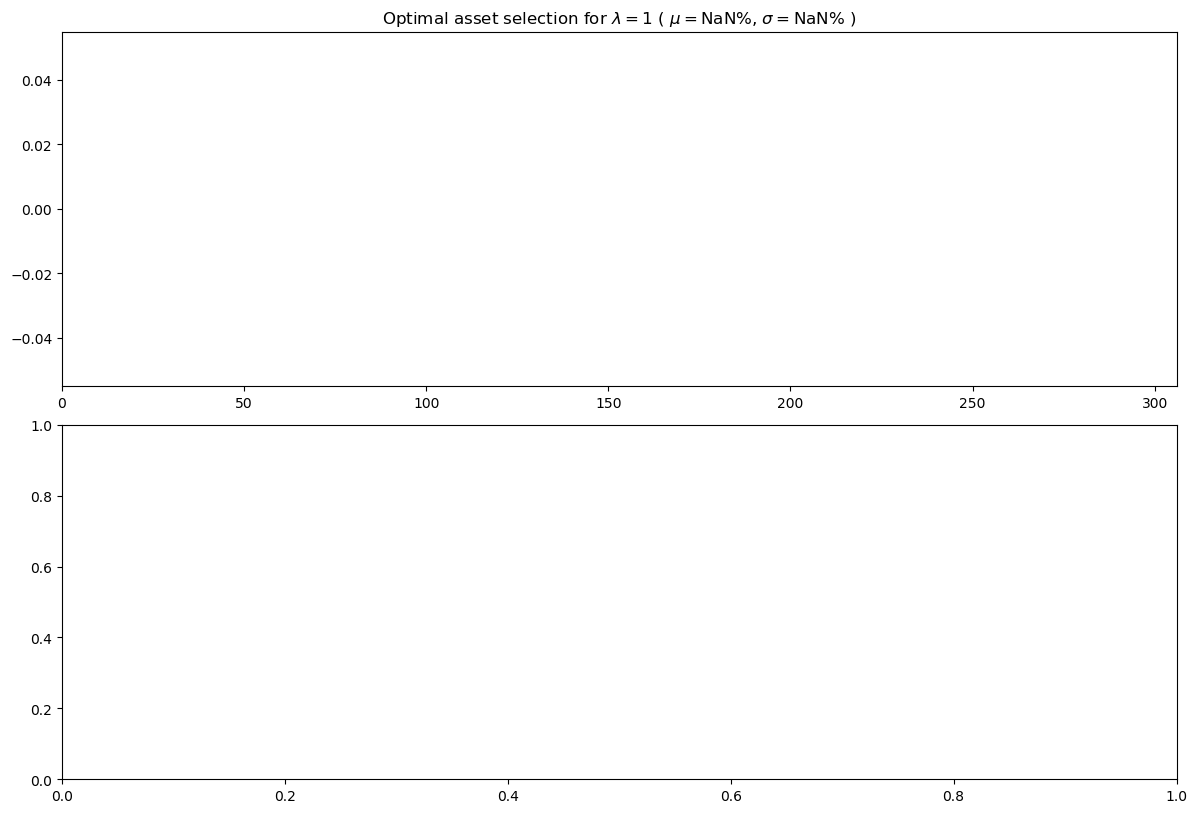

In [253]:
# find optimal portfolio for one particular choice of λ
using JuMP, Mosek, PyPlot

m = Model(solver = MosekSolver(LOG=0))
@variable(m, x[1:nAssets]) # Investment amounts non-negative (cannot sell short assets)

@constraint(m, max_c[i in 1:nAssets], x[i] <= 0) # Investment amounts non-negative (cannot sell short assets)
#@constraint(m, min_c[i in 1:nAssets], x[i] >= -0.5)

#@constraint(m,sum(abs(x)) == -1)     # Must invest all of portfolio
tempAbs = 0

for i in 1:nAssets
    tempAbs += x[i]
end
print(tempAbs)
@constraint(m, tempAbs == 1)

figure(figsize=(12,8))

subplot(211)
λ = 1
t2 = 0.03
#t2 = 0
@objective(m, Min, -dot(μ,x) + λ*dot(x,Σ*x) - t2*dot(percent_diffs,x))
solve(m)
xsol1 = getvalue(x)
xsol1 = clean_xsol(xsol1)
#ix1 = findall(xsol1 .> 1e-4 )
ix1 = findall(xsol1 .< -1e-4 ) #for short portfolio
ret = dot(μ,xsol1)
std = sqrt(dot(xsol1,Σ*xsol1))
xlim(0,nAssets)
bar(1:nAssets,xsol1[ix])
title(string("Optimal asset selection for \$\\lambda=1\$"," ( \$\\mu=\$", round(ret,digits=3), "%, \$\\sigma=\$", round(std,digits=2), "% )"));
tight_layout()
subplot(212)
#λ = 3e-2

# @objective(m, Min, -dot(μ,x) + λ*dot(x,Σ*x) )
# solve(m)
# xsol2 = getvalue(x)
# ix2 = findall(xsol2 .> 1e-4)
# ret = dot(μ,xsol2)
# std = sqrt(dot(xsol2,Σ*xsol2))
# xlim(0,nAssets)
# bar(1:nAssets,xsol2[ix])
# title(string("Optimal asset selection for \$\\lambda=3\$ x \$ 10^{2}\$"," ( \$\\mu=\$", round(ret,digits=3), "%, \$\\sigma=\$", round(std,digits=2), "% )"));
# tight_layout()


print(m)

In [242]:
check_profits(ix1, 100000, prices_test, prices_val, xsol1)

Loop started-0.49112144145897924
Bought CF at 54.5079994 sold: 40.810001
Loop started-0.5088785556146678
Bought R at 92.849998 sold: 56.830002
Total profit: -32083.31371137327
Portfolio returns (percent) -0.3208331371137327


In [234]:
function clean_xsol(xsoli)
    xsol = xsoli
    for i in 1:length(xsol)
        #print(l)
        #println(xsol[i])
        if abs(xsol[i]) < 0.0001
            xsol[i] = 0
#         else
#             xsol[i] = xsol[i]*-1
        end
    end
    return xsol
end

clean_xsol (generic function with 1 method)

In [246]:
minimum(xsol1)

-0.5088785556146678

In [144]:
t2*dot(percent_diffs,xsol1)

0.012468485726101684

In [202]:
clean_xsol(xsol1)

UndefVarError: UndefVarError: l not defined

In [147]:
raw_test[173,:]

DataFrameRow. Omitted printing of 74 columns
│ Row │ Ticker Symbol │ Period Ending │ Accounts Payable │ Accounts Receivable │
│     │ String⍰       │ Dates…⍰       │ Int64⍰           │ Int64⍰              │
├─────┼───────────────┼───────────────┼──────────────────┼─────────────────────┤
│ 173 │ LUK           │ 2014-12-31    │ 10516491000      │ -499310000          │